## **24-2학기 가이드 프로젝트**


*   가이드 코드에는 이상치 처리, 수치형 변수 정규화/표준화, 하이퍼파라미터 튜닝, feature selection 등이 생략되어 있습니다. 해당 부분들 중 필요하다고 생각하는 부분을 직접 수행해보세요
*   가이드 코드는 어디까지나 참고용입니다. 꼭 가이드 코드대로 프로젝트를 수행할 필요는 없으니 팀별로 자유롭게 프로젝트를 진행해주세요 :)



In [1]:
#코랩 환경에서 실행
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# train/test 데이터 가져오기
train_df = pd.read_csv('/content/train_data.csv')
train_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,41,Private,170230,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,0
1,20,Private,435469,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,Mexico,0
2,73,Private,29778,HS-grad,9,Widowed,Other-service,Not-in-family,White,Female,0,0,37,United-States,0
3,56,Self-emp-inc,105582,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,50,United-States,1
4,53,Private,167065,11th,7,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0


In [4]:
#test 데이터 가져오기
test_df = pd.read_csv('/content/test_data.csv')
test_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,45,Federal-gov,207107,Assoc-acdm,12,Divorced,Adm-clerical,Unmarried,Asian-Pac-Islander,Male,0,2080,40,Philippines,0
1,22,Self-emp-not-inc,197387,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
2,39,Private,111268,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,0
3,35,Private,98283,Prof-school,15,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,0,0,40,India,1
4,40,Private,224232,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,1


## 데이터 전처리 - 결측값

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25020 entries, 0 to 25019
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25020 non-null  int64 
 1   workclass       23184 non-null  object
 2   fnlwgt          25020 non-null  int64 
 3   education       25020 non-null  object
 4   education.num   25020 non-null  int64 
 5   marital.status  25020 non-null  object
 6   occupation      23177 non-null  object
 7   relationship    25020 non-null  object
 8   race            25020 non-null  object
 9   sex             25020 non-null  object
 10  capital.gain    25020 non-null  int64 
 11  capital.loss    25020 non-null  int64 
 12  hours.per.week  25020 non-null  int64 
 13  native.country  24437 non-null  object
 14  income          25020 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.9+ MB


In [6]:
test_df.info()
#test data에 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7541 entries, 0 to 7540
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             7541 non-null   int64 
 1   workclass       7541 non-null   object
 2   fnlwgt          7541 non-null   int64 
 3   education       7541 non-null   object
 4   education.num   7541 non-null   int64 
 5   marital.status  7541 non-null   object
 6   occupation      7541 non-null   object
 7   relationship    7541 non-null   object
 8   race            7541 non-null   object
 9   sex             7541 non-null   object
 10  capital.gain    7541 non-null   int64 
 11  capital.loss    7541 non-null   int64 
 12  hours.per.week  7541 non-null   int64 
 13  native.country  7541 non-null   object
 14  income          7541 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 883.8+ KB


In [7]:
#train data에서 결측치가 존재하는 행 확인
train_df[train_df.isna().sum(axis=1) > 0]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
22621,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
22622,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
22623,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,1
22624,51,NaN,172175,Doctorate,16,Never-married,NaN,Not-in-family,White,Male,0,2824,40,United-States,1
22625,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25015,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,1
25016,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
25017,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,1
25018,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,0


In [8]:
#결측치가 존재하는 행의 고유한 값 확인
print(train_df['workclass'].unique())
print()
print(train_df['occupation'].unique())
print()
print(train_df['native.country'].unique())

['Private' 'Self-emp-inc' 'Self-emp-not-inc' 'State-gov' 'Local-gov'
 'Federal-gov' 'Without-pay' nan 'Never-worked']

['Exec-managerial' 'Other-service' 'Machine-op-inspct' 'Transport-moving'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Handlers-cleaners'
 'Sales' 'Farming-fishing' 'Protective-serv' 'Tech-support'
 'Priv-house-serv' 'Armed-Forces' nan]

['United-States' 'Mexico' 'Columbia' 'Germany' 'England' 'China' 'France'
 'Cuba' 'Poland' 'Haiti' 'India' 'El-Salvador' 'Dominican-Republic'
 'Yugoslavia' 'Philippines' 'Japan' 'Puerto-Rico' 'Italy' 'South' 'Iran'
 'Scotland' 'Hong' 'Ireland' 'Canada' 'Nicaragua' 'Thailand' 'Jamaica'
 'Cambodia' 'Ecuador' 'Trinadad&Tobago' 'Portugal' 'Guatemala' 'Hungary'
 'Vietnam' 'Outlying-US(Guam-USVI-etc)' 'Laos' 'Honduras' 'Greece' 'Peru'
 'Taiwan' 'Holand-Netherlands' nan]


In [9]:
#결측행 삭제
train_df_cleaned = train_df.dropna()

In [10]:
#결측치 제거 확인
train_df_cleaned.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [11]:
#결측치 없어진 train/test dataset
train = train_df_cleaned.copy(deep=True)
test = test_df.copy(deep=True)

In [12]:
train.shape

(22621, 15)

## 데이터 분포 시각화

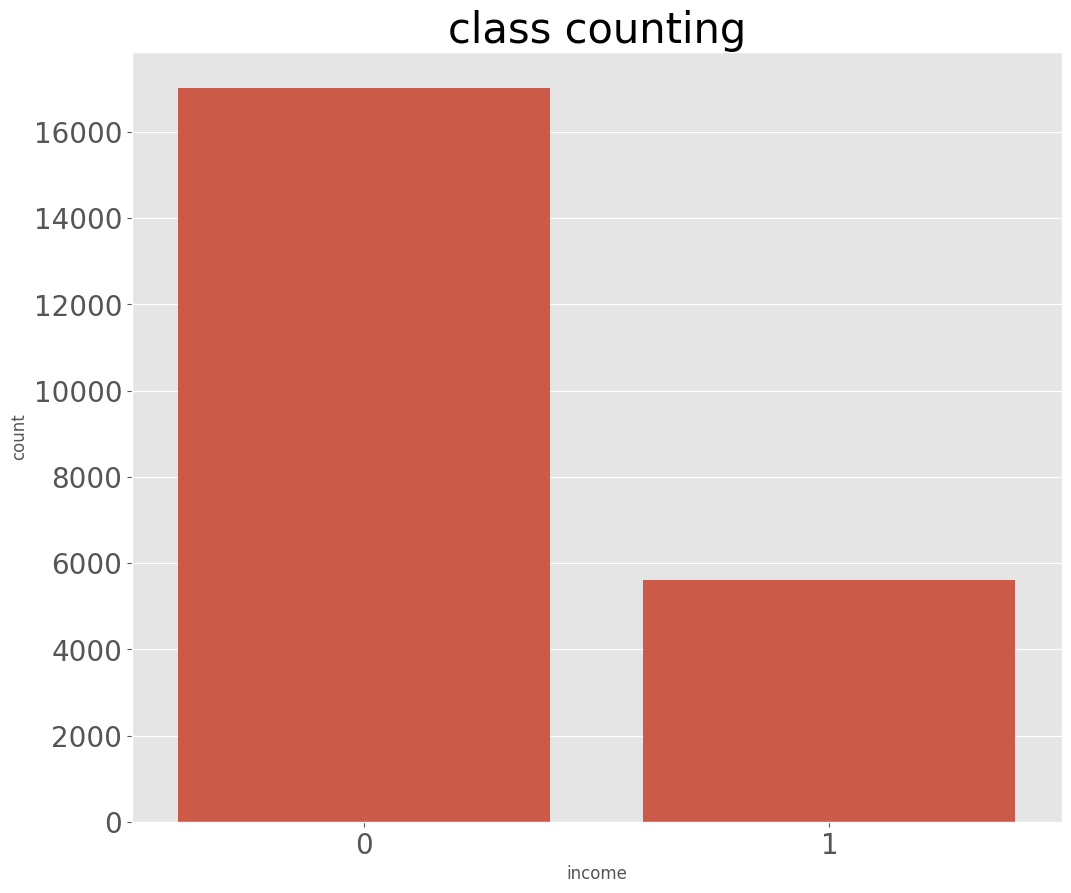

In [13]:
#target column의 value가 <=50k인 데이터 수와 >=50인 데이터 수 비교
counted_values = train['income'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
plt.title('class counting', fontsize = 30)
value_bar_ax = sns.barplot(x=counted_values.index, y=counted_values)
value_bar_ax.tick_params(labelsize=20)

In [14]:
#범주형 변수 시각화를 위한 데이터 생성
train_categori = train.drop(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'],axis = 1) #범주형이 아닌 피쳐 drop
train_categori.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,Private,Bachelors,Divorced,Exec-managerial,Unmarried,White,Female,United-States,0
1,Private,HS-grad,Never-married,Other-service,Own-child,White,Female,Mexico,0
2,Private,HS-grad,Widowed,Other-service,Not-in-family,White,Female,United-States,0
3,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,1
4,Private,11th,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,0


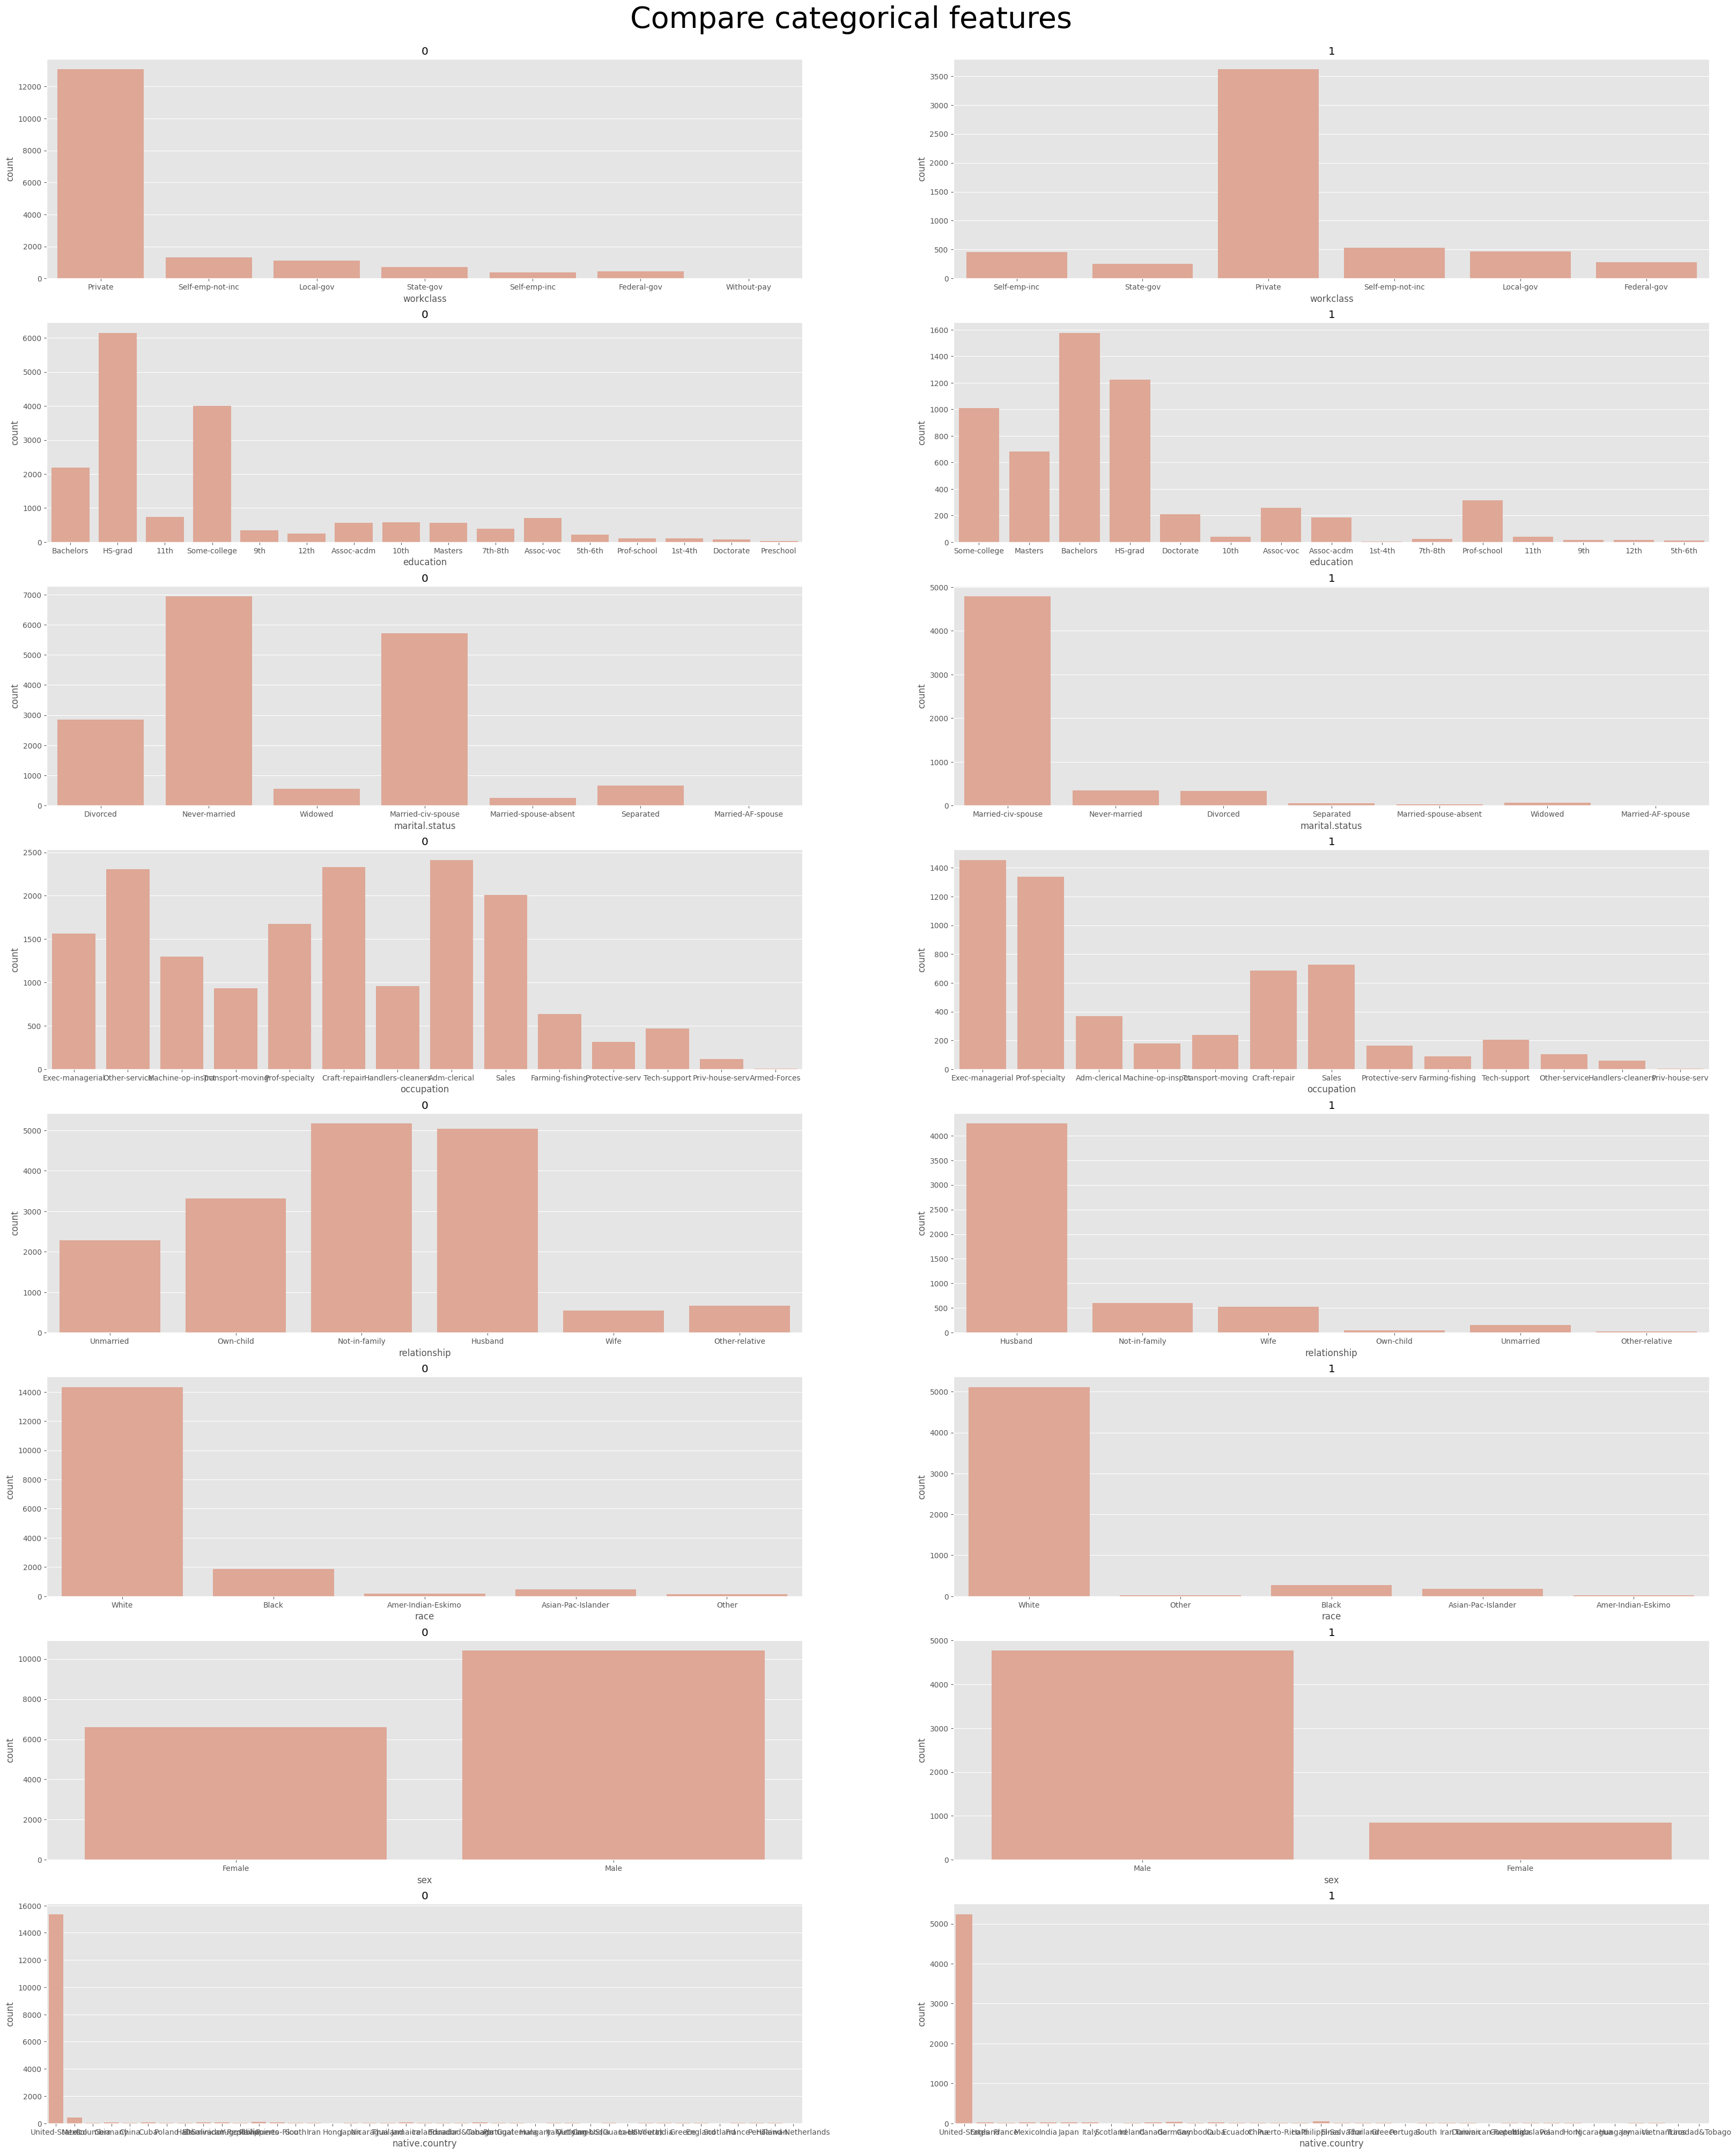

In [15]:
# 범주형 데이터 분포 확인
def visualize(axx, field, num): ##그래프를 그리기 위한 메소드
    sns.countplot(x=train_categori.columns[num], data= train_categori[train_categori['income'] == field],  color='#eaa18a', ax = axx) # countplot을 이용하여 그래프를 그려줍니다. # x 인자를 명시적으로 추가
    axx.set_title(field)

figure, ((ax1,ax2),(ax3,ax4), (ax5, ax6),(ax7, ax8), (ax9, ax10),
         (ax11,ax12),(ax13,ax14), (ax15, ax16))  = plt.subplots(nrows=8, ncols=2) ## 원하는 개수의 subplots 만들어주기
figure.set_size_inches(40, 50) #(w,h)
figure.suptitle('Compare categorical features', fontsize=40, y = 0.9)

k = 0 # 피쳐 수
j = 1 # 그래프 수
while k<8:
    for i in range(0,2):
        visualize(eval(f'ax{j}'), train_categori['income'].unique()[i], k)
        j = j+1
    k = k+1

In [16]:
# 수치형 변수 데이터를 확인하기 위한 데이터 생성
train_numeric = train[['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week', 'income']] #수치형 피쳐와 label인 target 추출
train_numeric.head()


,age,fnlwgt,capital.gain,capital.loss,hours.per.week,income
0,41,170230,0,0,45,0
1,20,435469,0,0,40,0
2,73,29778,0,0,37,0
3,56,105582,7688,0,50,1
4,53,167065,0,0,40,0


In [17]:
#수치형 변수 데이터의 통계 확인
train_numeric.describe()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week,income
count,22621.000000,2.262100e+04,22621.000000,22621.000000,22621.000000,22621.000000
mean,38.379073,1.900945e+05,1079.113700,89.645285,40.948101,0.248000
std,13.091358,1.057809e+05,7297.446215,407.271262,12.010865,0.431861
min,17.000000,1.376900e+04,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178020e+05,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.785960e+05,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.374520e+05,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000,1.000000


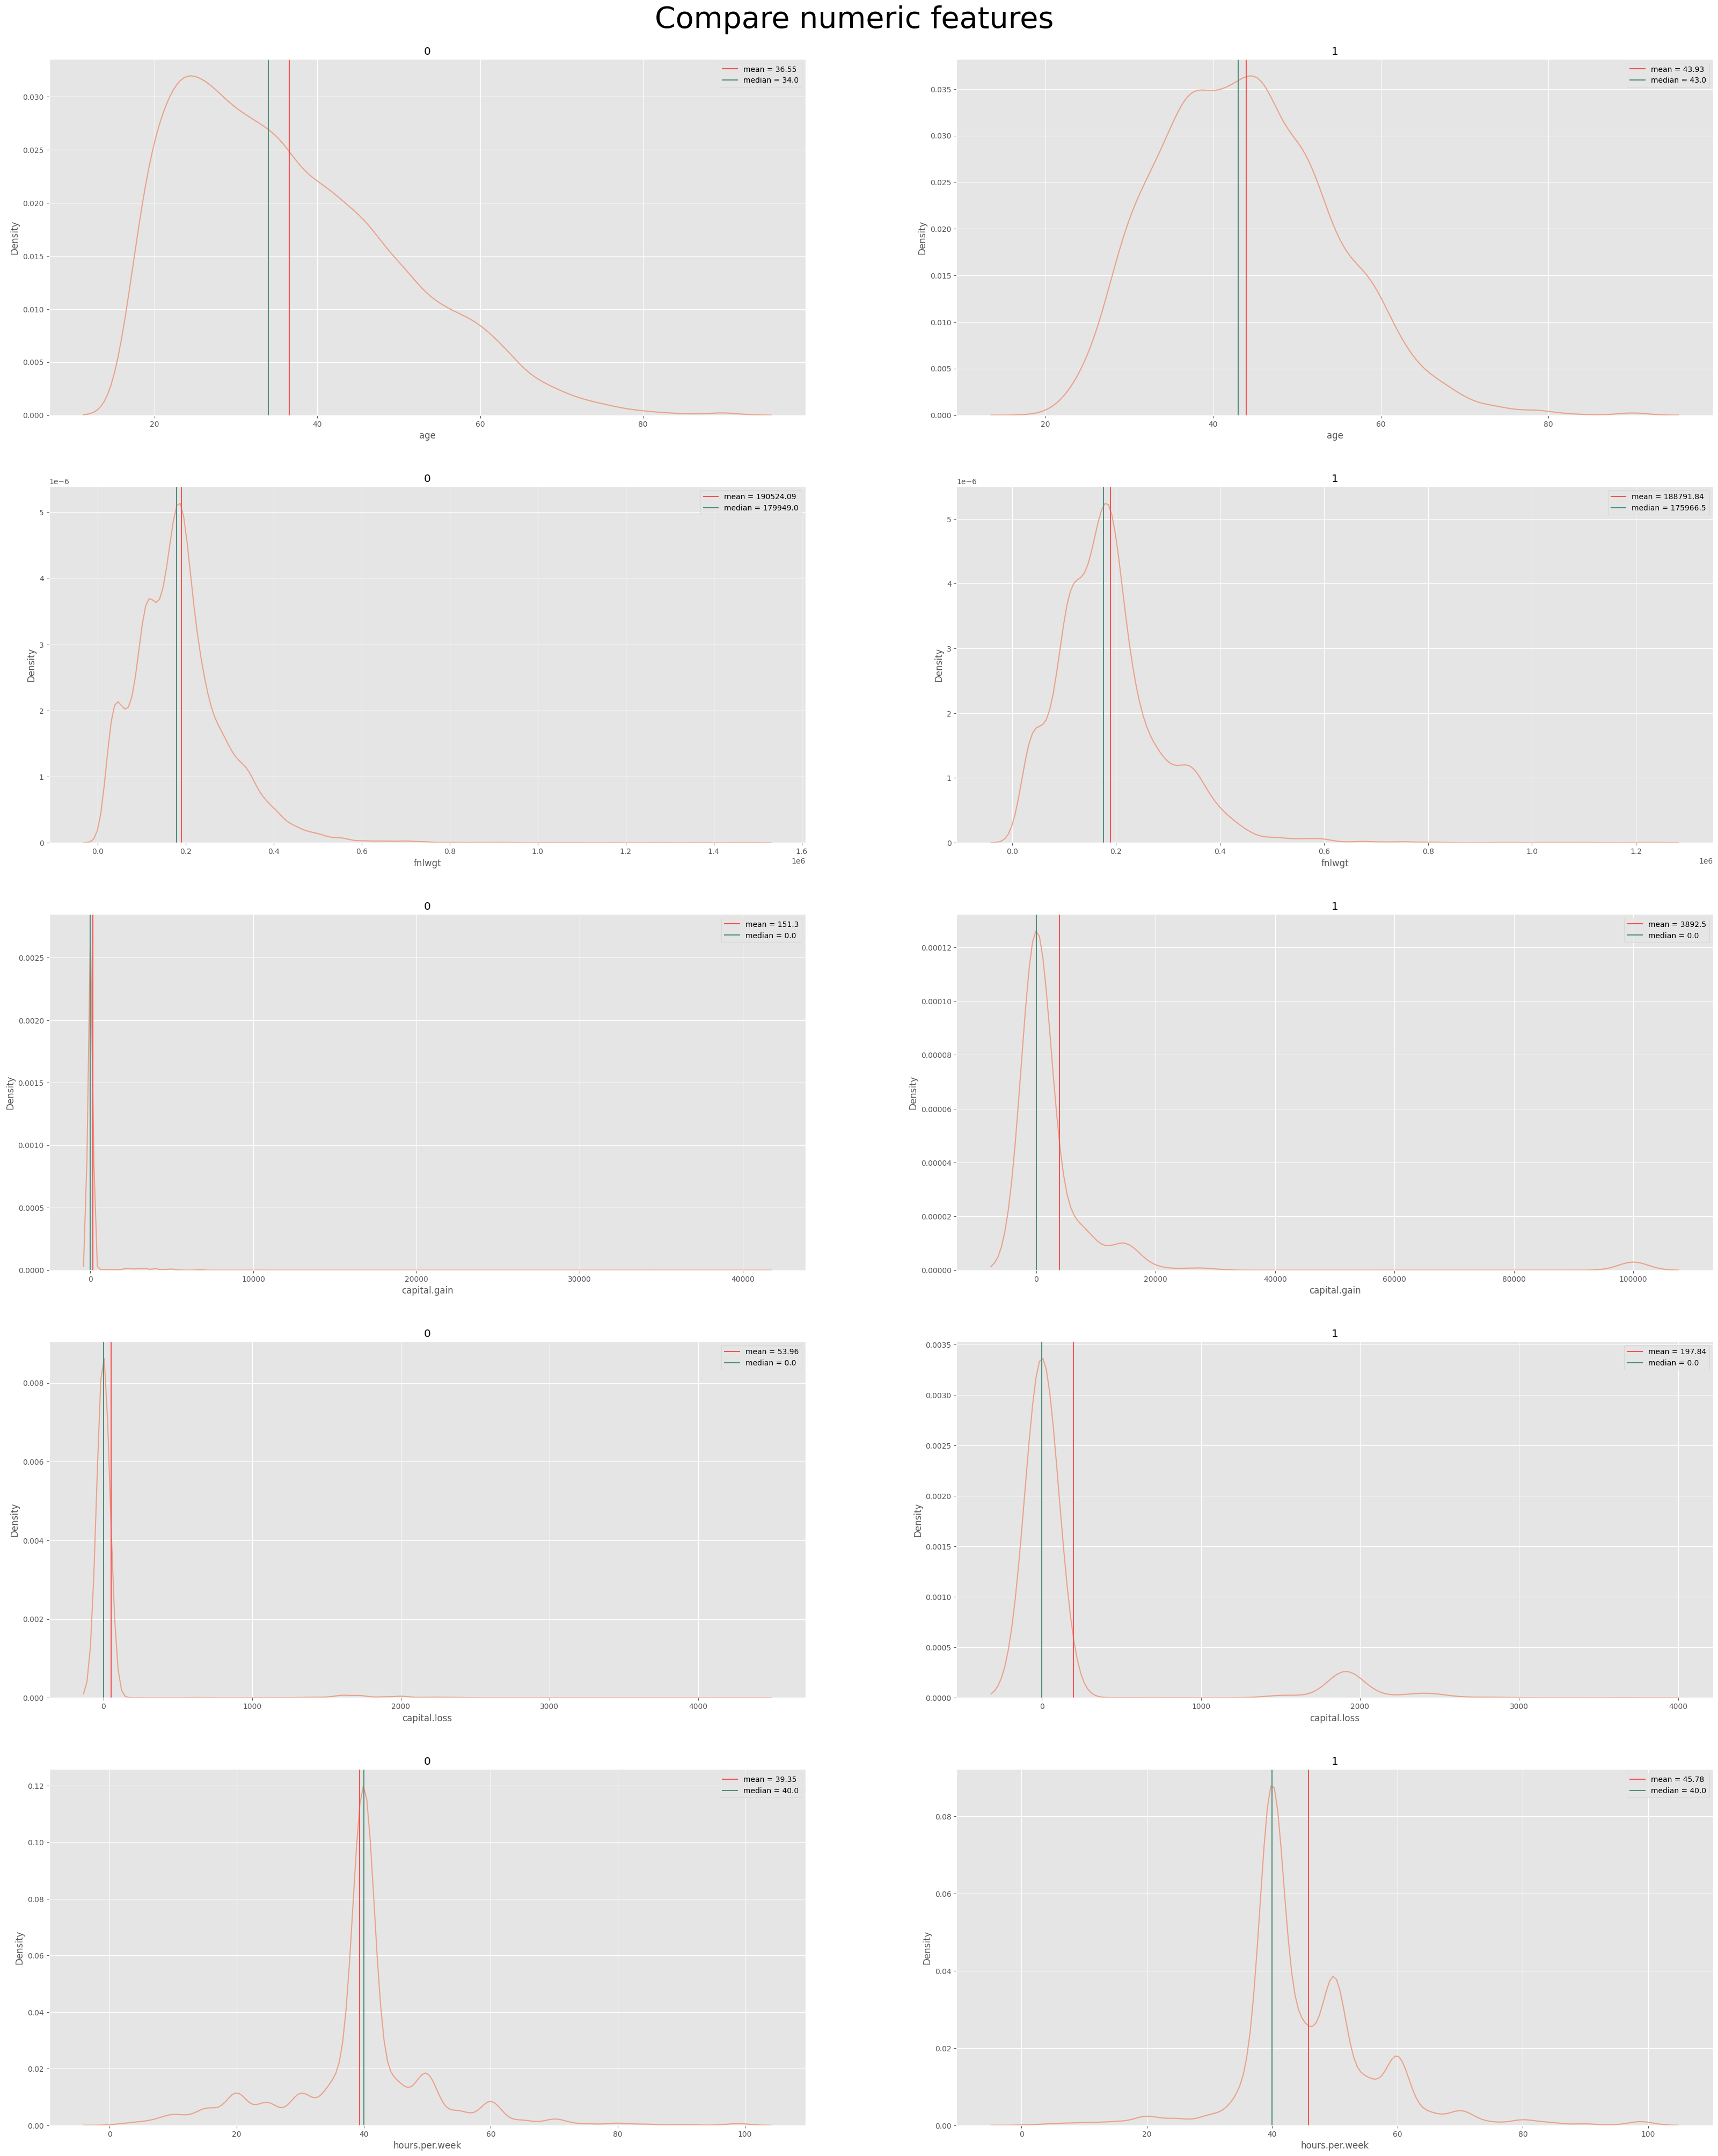

In [18]:
# 수치형 데이터 분포
def visualize(axx, field, num):
    line = train_numeric[train_numeric['income'] == field] #메소드에서 target 클래스 추춣
    name = train_numeric[train_numeric['income'] == field][train_numeric.columns[num]].name #메소드에서 이름 추출
    sns.kdeplot(x = line[train_numeric.columns[num]],  data = train_numeric, ax = axx, color='#eaa18a') #countplot을 이용하여 그래프를 그려준다
    axx.axvline(line.describe()[name]['mean'], c='#f55354', label = f"mean = {round(line.describe()[name]['mean'], 2)}") #mean 통계값을 표기
    axx.axvline(line.describe()[name]['50%'], c='#518d7d', label = f"median = {round(line.describe()[name]['50%'], 2)}") #median 통계값을 표기
    axx.legend()
    axx.set_title(field)

figure, ((ax1,ax2),(ax3,ax4), (ax5, ax6),(ax7, ax8), (ax9, ax10))  = plt.subplots(nrows=5, ncols=2) ##원하는 개수의 subplots 만들어주기
figure.set_size_inches(40, 50) #(w,h)
figure.suptitle('Compare numeric features', fontsize=40, y = 0.9)

k = 0 # 피쳐 수
j = 1 # 그래프 수
while k<5:
    for i in range(0,2):
        visualize(eval(f'ax{j}'), train_numeric['income'].unique()[i], k)
        j = j+1
    k = k+1

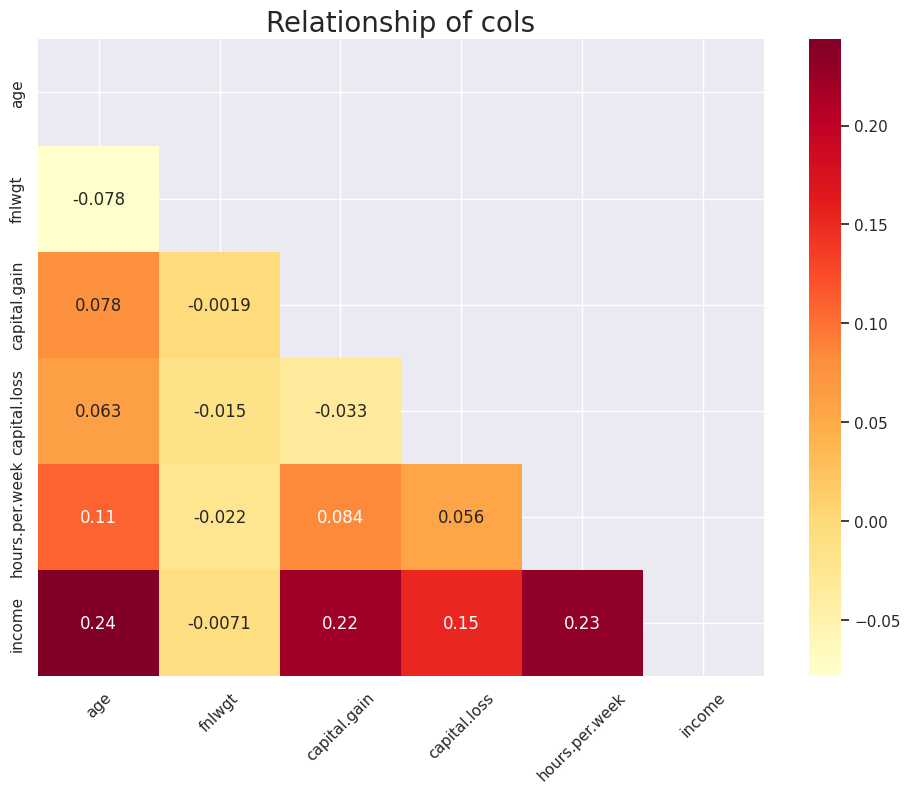

In [19]:
# 수치형 변수 상관 관계 확인
corr_df = train_numeric.corr()

# 사이즈 조정
sns.set(rc={'figure.figsize':(11.7,8.27)})

# 절반만 표시하기 위한 mask 설정
mask=np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)]=True

ax = sns.heatmap(corr_df,
                 annot=True, # 데이터 값 표시
                 mask=mask, # 마스크 적용 표시
                 cmap='YlOrRd') # 노랑 / 오렌지 / 빨강

plt.xticks(rotation=45)
plt.title('Relationship of cols', fontsize=20)
plt.show()

## 범주형 인코딩

머신러닝 알고리즘은 숫자형 데이터를 필요로 하므로 범주형 변수를 수치형 변수로 변환
가이드 코드에서는 label-encoding 방법을 사용

In [20]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder 생성 및 적용
label_encoders = {}

for column in train.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()

    # Train 데이터를 인코딩
    train[column] = label_encoders[column].fit_transform(train[column])

    # Test 데이터를 인코딩
    test[column] = label_encoders[column].transform(test[column])


In [21]:
train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,41,2,170230,9,13,0,3,4,4,0,0,0,45,38,0
1,20,2,435469,11,9,4,7,3,4,0,0,0,40,25,0
2,73,2,29778,11,9,6,7,1,4,0,0,0,37,38,0
3,56,3,105582,15,10,2,3,0,4,1,7688,0,50,38,1
4,53,2,167065,1,7,2,6,0,4,1,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22616,22,2,147655,15,10,4,12,1,4,0,0,0,40,38,0
22617,50,5,211319,12,14,4,9,1,4,1,0,0,38,38,0
22618,25,2,193820,9,13,4,11,1,4,0,0,1876,40,38,0
22619,35,2,117166,9,13,4,3,1,4,1,0,0,50,38,0


In [22]:
test

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,45,0,207107,7,12,0,0,4,1,1,0,2080,40,29,0
1,22,4,197387,11,9,4,4,3,4,1,0,0,40,38,0
2,39,2,111268,9,13,4,0,3,4,0,0,0,40,38,0
3,35,2,98283,14,15,4,9,1,1,1,0,0,40,18,1
4,40,2,224232,9,13,2,11,0,4,1,0,0,40,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7536,20,2,368852,15,10,4,7,3,4,0,0,0,20,38,0
7537,52,2,164135,11,9,2,3,0,4,1,0,0,50,38,1
7538,50,2,226497,15,10,2,12,0,4,1,0,0,45,38,1
7539,26,2,290213,15,10,5,4,3,4,1,0,0,40,38,0


## 모델 학습

가이드 코드에서는 LogisticRegression을 예시로 보여드립니다! 다양한 모델 및 분석방법을 통해 정확도를 높여주세요!

In [23]:
X = train.drop(['income'], axis=1)
y = train['income']
print(X.shape, y.shape)

(22621, 14) (22621,)


In [24]:
# 모델의 성능을 측정하기 위해서 데이터를 train 데이터와 valid 데이터로 분리
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                      y,
                                                      test_size=0.2,
                                                      random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 모델 선언
model = LogisticRegression(random_state=0)

# 모델 학습
model.fit(X_train, y_train)
pred = model.predict(X_valid)
score = accuracy_score(y_valid, pred)

print(f"LogisticRegression 모델 정확도: {score*100:.2f}%")

LogisticRegression 모델 정확도: 78.83%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 모델의 test set 성능 확인

In [26]:
#test score 출력을 위한 x,y 데이터 분리
test_x = test.drop('income', axis=1)
test_y = test['income']

In [27]:
#test set score 출력
final_prediction = model.predict(test_x)
score=accuracy_score(test_y, final_prediction)
print(f"LogisticRegression test set 모델 정확도: {score*100:.2f}%")

LogisticRegression test set 모델 정확도: 78.16%
